In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ast

# Шаг 0: Исходные данные

In [ ]:
file_path = 'Kovalev_Dmitriy_Delone.wdx'

with open(file_path, 'r') as file:
    data = file.read()

# Разбор строки
points = ast.literal_eval(data.replace('{', '[').replace('}', ']'))

print(points)
len(points)

[[-6.36721, -3.43292], [4.60429, 8.17509], [-1.69098, -5.76507], [-7.81532, -5.72862], [2.39057, 7.27071], [1.40153, 5.1324], [-6.8644, -3.19349], [3.66193, 0.957985], [-4.93424, -4.91237], [-4.8569, -1.29683], [8.16357, 5.73102], [-3.32183, 3.33598], [-1.35098, -6.1675], [3.80279, 4.0104], [-0.556553, 5.01534], [2.46505, 5.74973], [2.51093, 5.0366], [6.94296, -3.6154], [1.92903, 9.04861], [7.49604, -6.28853], [6.90664, 5.91739], [7.02187, 3.0455], [-3.34436, -6.30564], [3.06572, 0.387972], [3.22387, -4.42353], [-4.67571, 1.87842], [2.69409, -8.82404], [0.116141, -8.64032], [-9.70246, 1.92096], [1.61458, -0.441634], [-8.79214, -3.69046], [9.7027, -2.36963], [-0.555132, 0.164412], [-4.31904, -1.79085], [-0.779073, 0.846959], [-7.25513, 4.54302], [-2.02277, -2.16208], [-0.204412, 2.72032], [2.80923, 3.558], [2.66558, -2.45029], [0.457893, -9.28612], [1.94655, -6.84234], [-2.76613, -8.40303], [6.24271, -3.1581], [3.16486, -2.29527], [3.18408, 9.13735], [-1.95899, 2.18873], [7.13994, -6.98

321

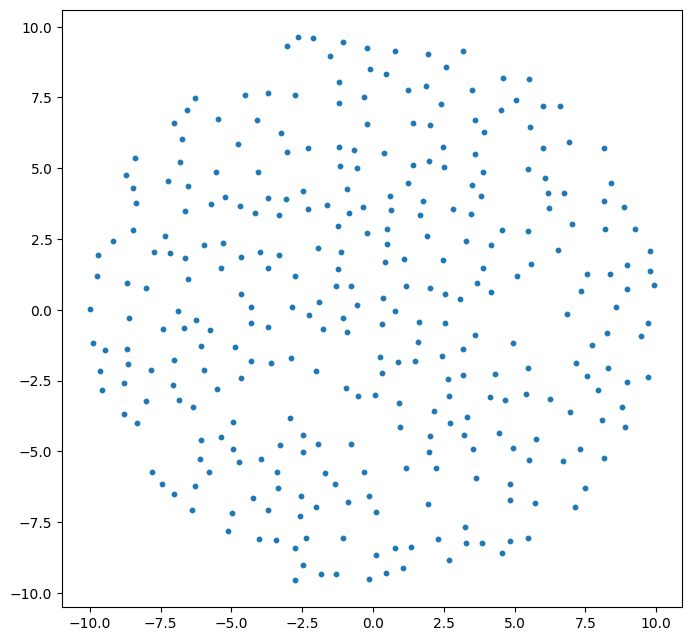

In [ ]:
# Визуализация точек
plt.figure(figsize=(8, 8))
plt.scatter(*zip(*points), s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Шаг 1: Двумерная триангуляция Делоне

In [ ]:
# Выполнение триангуляции Делоне
tri = Delaunay(points)

# Извлечь индексы вершин для каждого треугольника.
triangles_indices = tri.simplices  # Массив треуголькников (содержать только номера точек)
print(triangles_indices)

[[259  47 236]
 [183  19  47]
 [ 72  71 260]
 ...
 [ 56 251  38]
 [251 148 277]
 [ 38 251 277]]


In [ ]:
# Вычисление центральной точки P_c
P_c = np.mean(points, axis=0)
print(P_c)

[-0.14051971  0.02254932]


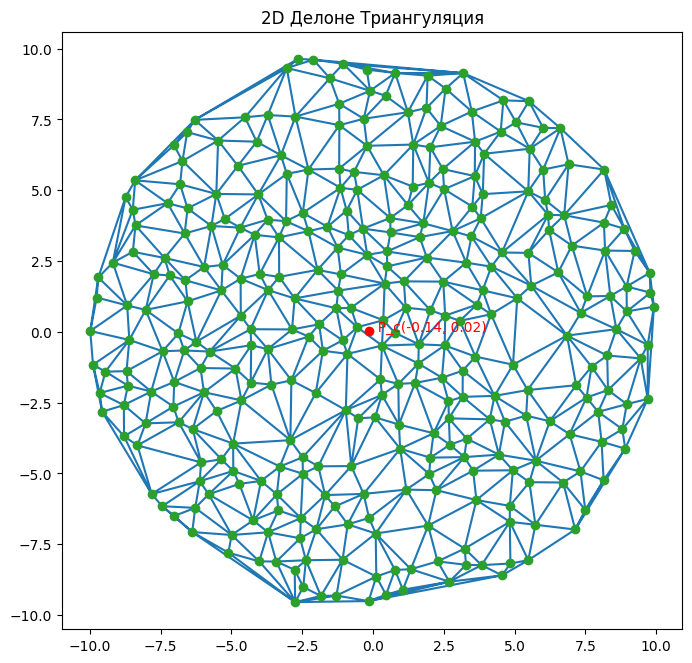

In [ ]:
# Визуализация 2D триангуляции Делоне
plt.figure(figsize=(8, 8))
plt.triplot([p[0] for p in points], [p[1] for p in points], triangles_indices)
plt.scatter(P_c[0], P_c[1], color='red', zorder=5)
plt.text(P_c[0], P_c[1], f'  P_c({P_c[0]:.2f}, {P_c[1]:.2f})', color='red')
plt.plot([p[0] for p in points], [p[1] for p in points], 'o')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('2D Делоне Триангуляция')
plt.show()


# Шаг 2: Трехмерное преобразование

In [ ]:
# Преобразование точек в 3D
def transform_to_3D(points, L, r):
    # Расчет центроидной точки P_c
    P_c = np.mean(points, axis=0)

    # Размещение P_o над P_c на расстоянии L
    P_o = np.array([P_c[0], P_c[1], L])

    # Преобразование точек в 3D, проекция на сферу
    B_i = []
    for P_i in points:
        A_i = np.array([P_i[0], P_i[1], 0]) - P_o # отрезка A_i = P_i - P_o
        direction = A_i / np.linalg.norm(A_i)  # Нормализация вектора направления
        B_i.append(P_o + r * direction)  # Пересечение с сферой

    return np.array(B_i), P_o

In [ ]:
L = 15  # Расстояние от P_c до P_o
r = 7  # Радиус сферы, меньше L

B_i, P_o = transform_to_3D(points, L, r)

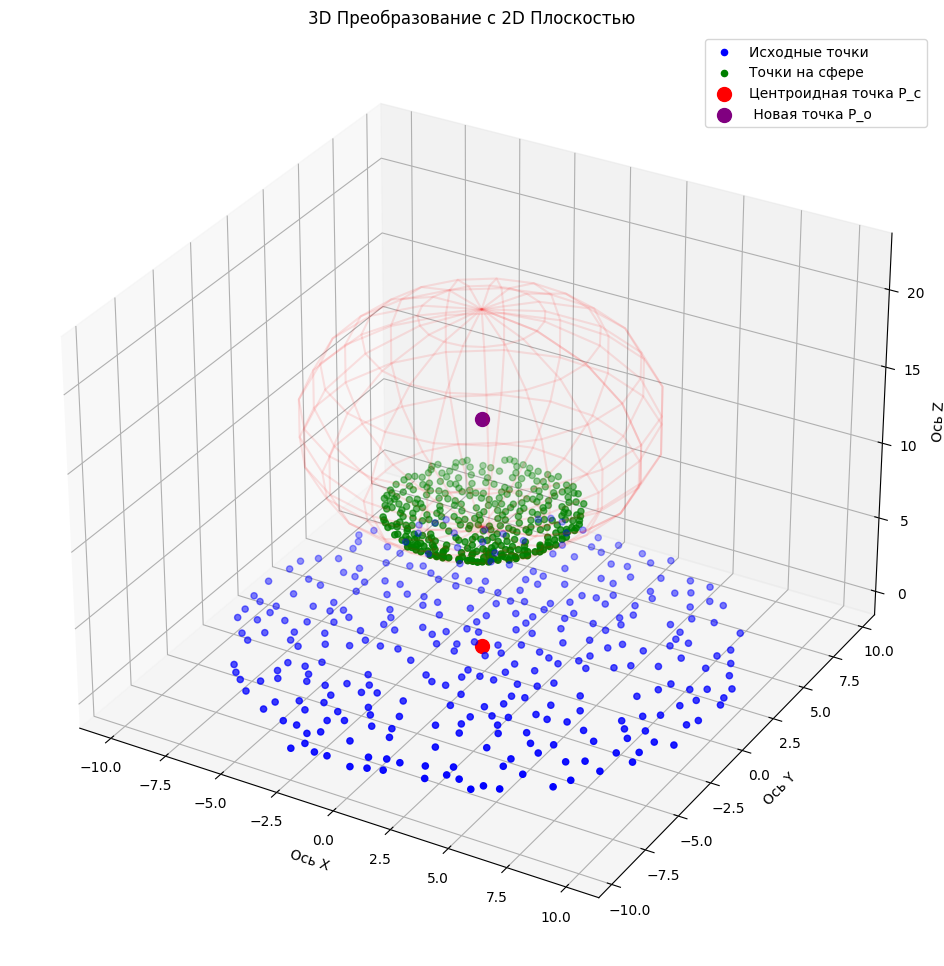

In [ ]:
# Визуализация 3D преобразования с 2D плоскостью
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Исходные 2D-точки в 3D-пространстве (как 3D-точки с z=0).
x_2d, y_2d = zip(*points)
ax.scatter(x_2d, y_2d, np.zeros(len(points)), color='blue', label='Исходные точки')

# 3D точки на сфере
x_sphere, y_sphere, z_sphere = zip(*B_i)
ax.scatter(x_sphere, y_sphere, z_sphere, color='green', label='Точки на сфере')

# Отображение сферы для справки
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = P_o[0] + r * np.cos(u) * np.sin(v)
y = P_o[1] + r * np.sin(u) * np.sin(v)
z = P_o[2] + r * np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.1)

# Центроидная точка P_c
ax.scatter(P_c[0], P_c[1], 0, color='red', s=100, label='Центроидная точка P_c')

# Новая точка P_o
ax.scatter(P_o[0], P_o[1], P_o[2], color='purple', s=100, label=' Новая точка P_o')

ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')
plt.title('3D Преобразование с 2D Плоскостью')
ax.legend()

plt.show()

# Шаг 3: Трехмерная триангуляция

In [ ]:
triangles_indices # Массив треуголькников (содержать только номера точек)

array([[259,  47, 236],
       [183,  19,  47],
       [ 72,  71, 260],
       ...,
       [ 56, 251,  38],
       [251, 148, 277],
       [ 38, 251, 277]], dtype=int32)

In [ ]:
edges = set()
for simplex in triangles_indices:
    for i in range(3):
        edge = (simplex[i], simplex[(i+1) % 3])
        edges.add(tuple(sorted(edge)))

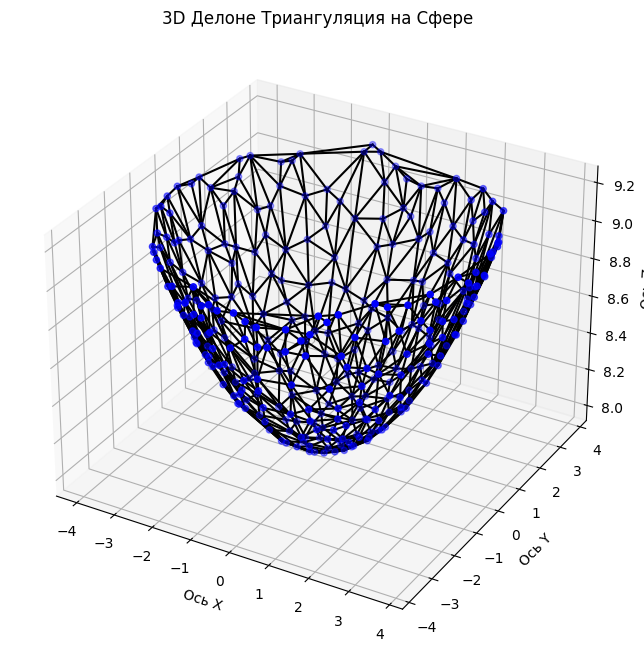

In [ ]:
# Визуализация 3D триангуляции Делоне
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Отрисовка точек
ax.scatter(B_i[:, 0], B_i[:, 1], B_i[:, 2], c='b', marker='o')

# Отрисовка рёбер
for edge in edges:
     start_point = B_i[edge[0]]
     end_point = B_i[edge[1]]
     ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], 'k-')

ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')
plt.title('3D Делоне Триангуляция на Сфере')

plt.show()

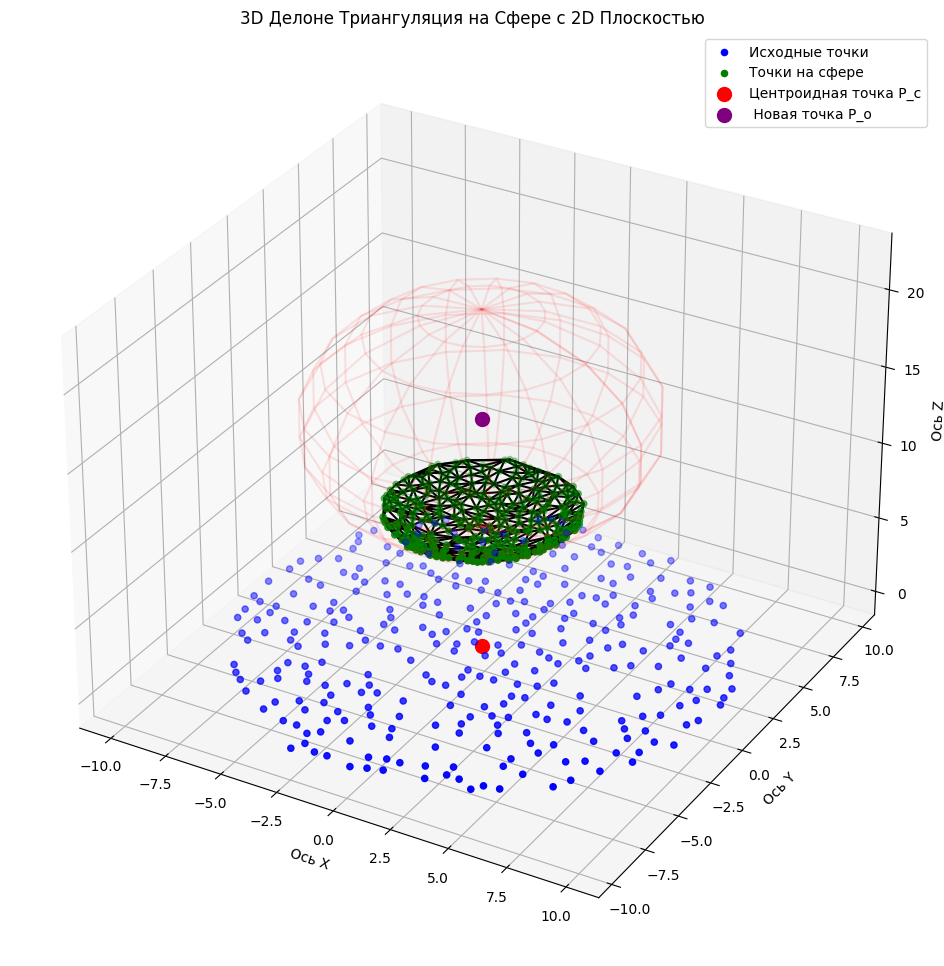

In [ ]:
# Визуализация 3D Делоне Триангуляция на Сфере с 2D Плоскостью
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Исходные 2D-точки в 3D-пространстве (как 3D-точки с z=0).
x_2d, y_2d = zip(*points)
ax.scatter(x_2d, y_2d, np.zeros(len(points)), color='blue', label='Исходные точки')

# 3D точки на сфере
x_sphere, y_sphere, z_sphere = zip(*B_i)
ax.scatter(x_sphere, y_sphere, z_sphere, color='green', label='Точки на сфере')

# Отрисовка рёбер
for edge in edges:
     start_point = B_i[edge[0]]
     end_point = B_i[edge[1]]
     ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], 'k-')

# Отображение сферы для справки
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = P_o[0] + r * np.cos(u) * np.sin(v)
y = P_o[1] + r * np.sin(u) * np.sin(v)
z = P_o[2] + r * np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.1)

# Центроидная точка P_c
ax.scatter(P_c[0], P_c[1], 0, color='red', s=100, label='Центроидная точка P_c')

# Новая точка P_o
ax.scatter(P_o[0], P_o[1], P_o[2], color='purple', s=100, label=' Новая точка P_o')

ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')
plt.title('3D Делоне Триангуляция на Сфере с 2D Плоскостью')
ax.legend()

plt.show()